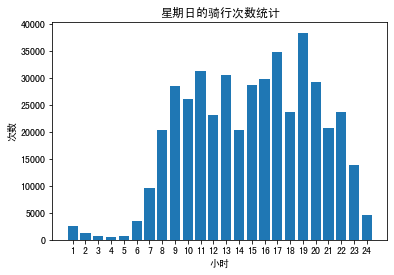

<Figure size 432x288 with 0 Axes>

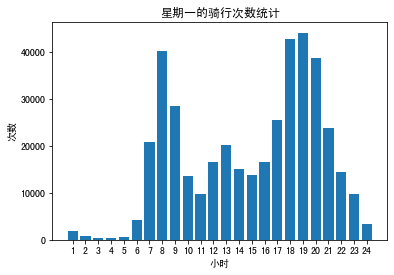

<Figure size 432x288 with 0 Axes>

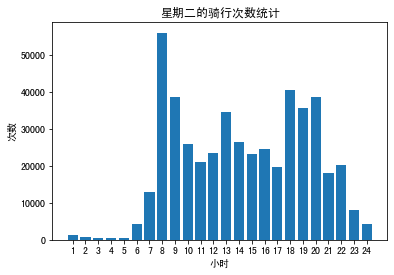

<Figure size 432x288 with 0 Axes>

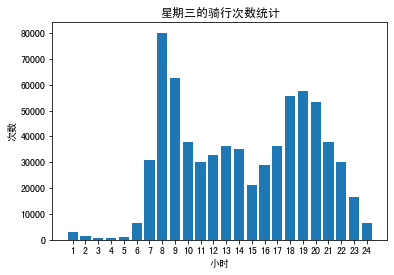

<Figure size 432x288 with 0 Axes>

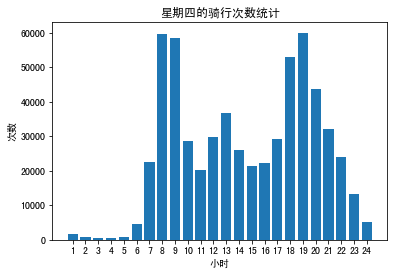

<Figure size 432x288 with 0 Axes>

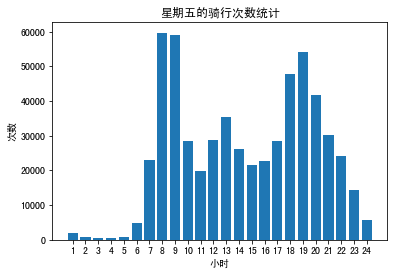

<Figure size 432x288 with 0 Axes>

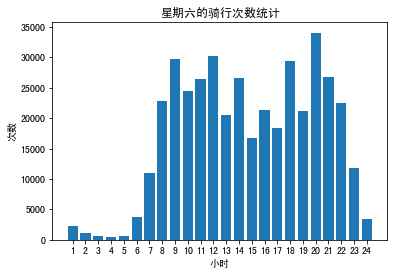

<Figure size 432x288 with 0 Axes>

In [11]:
import pandas as pd
import numpy as np
import geohash2
import matplotlib.pyplot as plt

df = pd.read_csv(
    'D:\\Program_file\\python_file\\python.con\\mobike_train_data.csv')

df['starttime'] = pd.to_datetime(df.starttime)
df = df.sort_values(by='starttime', ascending=True)
df.index = df['starttime']
#df = df['2017-05-15 06:00:00' : '2017-05-15 06:30:00']

dayTimeIndex = [x for x in range(0, 24)]
dayTime = [[0]*24, [0]*24]
Count = []
for a in range(10, 25):
    One = []
    for b in range(23):
        dx = df["2017-05-{:0>2d} {:0>2d}:00:00".format(
            a, dayTimeIndex[b]): "2017-05-{:0>2d} {:0>2d}:00:00".format(a, dayTimeIndex[b+1])]
        One.append(dx.shape[0])
        dayTime[0][b] += dx.shape[0]
        if dx.shape[0] != 0:
            dayTime[1][b] += 1
    dx = df["2017-05-{:0>2d} {:0>2d}:00:00".format(
            a, 23): "2017-05-{:0>2d} {:0>2d}:00:00".format(a + 1, 0)]
    One.append(dx.shape[0])
    dayTime[0][23] += dx.shape[0]
    if dx.shape[0] != 0:
        dayTime[1][23] += 1
    Count.append(One)

for a in range(len(Count)):
    for b in range(len(Count[1])):
        if Count[a][b] < 100:
            Count[a][b] = dayTime[0][b]//dayTime[1][b]

CountWeek = []
for i in range(7):
    CountWeek.append([0]*24)
#CountWeek = [[0] * 24] * 7
for i in range(len(Count)):
    for a in range(len(Count[1])):
        CountWeek[(i + 10) % 7][a] += Count[i][a]

x = [x for x in range(24)]
tm=['日','一','二','三','四','五','六']
for i in range(len(CountWeek)):
    plt.figure()
    plt.bar(x, CountWeek[i])
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title('星期{}的骑行次数统计'.format(tm[i]))
    plt.xlabel('小时')
    plt.ylabel('次数')
    x_label=[x for x in range(1,25)]
    plt.xticks([i for i in range(24)], x_label)
    plt.show()
    plt.clf()

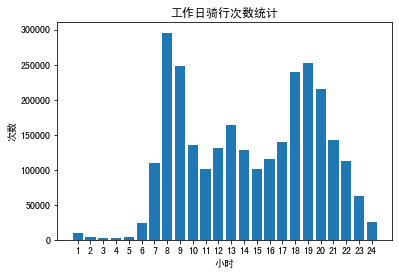

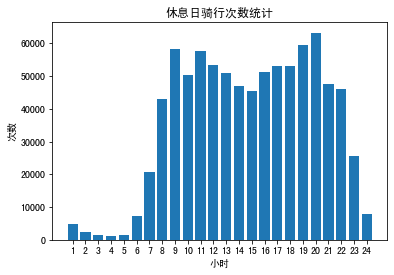

In [10]:
CountTwo = [[0] * 24, [0] * 24]
for i in range(len(CountWeek)):
    for a in range(len(CountWeek[1])):
        if i in [1, 2, 3, 4, 5]:
            CountTwo[0][a] += CountWeek[i][a]
        else:
            CountTwo[1][a] += CountWeek[i][a]
x = [x for x in range(24)]
plt.figure()
plt.bar(x, CountTwo[0])
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('工作日骑行次数统计')
plt.xlabel('小时')
plt.ylabel('次数')
x_label=[x for x in range(1,25)]
plt.xticks([i for i in range(24)], x_label)
plt.show()

plt.clf()
plt.bar(x, CountTwo[1])
plt.title('休息日骑行次数统计')
plt.xlabel('小时')
plt.ylabel('次数')
x_label=[x for x in range(1,25)]
plt.xticks([i for i in range(24)], x_label)
plt.show()
